<a href="https://colab.research.google.com/github/naokityokoyama/NLP/blob/main/NLP_processado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import nltk
#nltk.download('all')
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

In [4]:
#unidecode 
#pip install unidecode
from unidecode import unidecode
texto = 'Ótimo pésimo não é tão'
unidecode(texto)


'Otimo pesimo nao e tao'

In [5]:
base = [('eu sou admirada por muitos','alegria'),
        ('me sinto completamente amado','alegria'),
        ('amar e maravilhoso','alegria'),
        ('estou me sentindo muito animado novamente','alegria'),
        ('eu estou muito bem hoje','alegria'),
        ('que belo dia para dirigir um carro novo','alegria'),
        ('o dia está muito bonito','alegria'),
        ('estou contente com o resultado do teste que fiz no dia de ontem','alegria'),
        ('o amor e lindo','alegria'),
        ('nossa amizade e amor vai durar para sempre', 'alegria'),
        ('estou amedrontado', 'medo'),
        ('ele esta me ameacando a dias', 'medo'),
        ('isso me deixa apavorada', 'medo'),
        ('este lugar e apavorante', 'medo'),
        ('se perdermos outro jogo seremos eliminados e isso me deixa com pavor', 'medo'),
        ('tome cuidado com o lobisomem', 'medo'),
        ('se eles descobrirem estamos encrencados', 'medo'),
        ('estou tremendo de medo', 'medo'),
        ('eu tenho muito medo dele', 'medo'),
        ('estou com medo do resultado dos meus testes', 'medo')]

In [6]:
df = pd.DataFrame(base, columns=['frases', 'sentimento'])
df.head()

,frases,sentimento
0,eu sou admirada por muitos,alegria
1,me sinto completamente amado,alegria
2,amar e maravilhoso,alegria
3,estou me sentindo muito animado novamente,alegria
4,eu estou muito bem hoje,alegria


In [9]:
#Toda a base em uma unica string 
todas_palavras = ' '.join([texto for texto in df.frases])


str

In [45]:
#tokenizar
tolken = nltk.tokenize.WhitespaceTokenizer()
palavras_tolken = tolken.tokenize(todas_palavras)
print (f'A quantidade total de palavras é {len(palavras_tolken)}')

A quantidade total de palavras é 116


In [18]:
#frequencia 
frequencia = nltk.FreqDist(palavras_tolken)
frequencia.keys()
frequencia.values()
df_freq = pd.DataFrame({'Palavras': frequencia.keys(), 'Valor': frequencia.values()})


In [27]:
#as 10 mais 
df10 = df_freq.nlargest(columns='Valor', n=10)

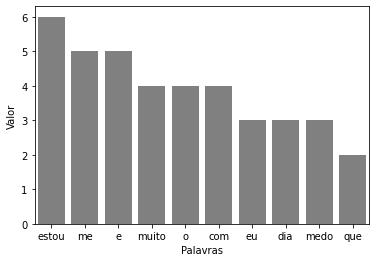

In [29]:
sns.barplot(data=df10 , x='Palavras', y='Valor', color='gray')

In [30]:
#lower
frases = df.frases.str.lower()
frases

0                            eu sou admirada por muitos
1                          me sinto completamente amado
2                                    amar e maravilhoso
3             estou me sentindo muito animado novamente
4                               eu estou muito bem hoje
5               que belo dia para dirigir um carro novo
6                               o dia está muito bonito
7     estou contente com o resultado do teste que fi...
8                                        o amor e lindo
9            nossa amizade e amor vai durar para sempre
10                                    estou amedrontado
11                         ele esta me ameacando a dias
12                              isso me deixa apavorada
13                              este lugar e apavorante
14    se perdermos outro jogo seremos eliminados e i...
15                         tome cuidado com o lobisomem
16              se eles descobrirem estamos encrencados
17                               estou tremendo 

In [31]:
#retirar pontuação
import string
sem_pontos = [ponto for ponto in frases if ponto not in string.punctuation]
sem_pontos

['eu sou admirada por muitos',
 'me sinto completamente amado',
 'amar e maravilhoso',
 'estou me sentindo muito animado novamente',
 'eu estou muito bem hoje',
 'que belo dia para dirigir um carro novo',
 'o dia está muito bonito',
 'estou contente com o resultado do teste que fiz no dia de ontem',
 'o amor e lindo',
 'nossa amizade e amor vai durar para sempre',
 'estou amedrontado',
 'ele esta me ameacando a dias',
 'isso me deixa apavorada',
 'este lugar e apavorante',
 'se perdermos outro jogo seremos eliminados e isso me deixa com pavor',
 'tome cuidado com o lobisomem',
 'se eles descobrirem estamos encrencados',
 'estou tremendo de medo',
 'eu tenho muito medo dele',
 'estou com medo do resultado dos meus testes']

In [32]:
#stopword
stopword =  nltk.corpus.stopwords.words('portuguese')
lista_pre1 = []
for i in sem_pontos: 
  sem_stopwords = [stop for stop in i.split() if stop not in stopword]
  lista_pre1.append(sem_stopwords)


In [33]:
print (f'sem pontos: {sem_pontos[0]} | lista_pre1: {lista_pre1[0]}')

sem pontos: eu sou admirada por muitos | lista_pre1: ['admirada', 'muitos']


In [34]:
#join
lista_pre2 = []
for i in range(len(lista_pre1)):
  lista_pre2.append(' '.join(lista_pre1[i]))
lista_pre2

['admirada muitos',
 'sinto completamente amado',
 'amar maravilhoso',
 'sentindo animado novamente',
 'bem hoje',
 'belo dia dirigir carro novo',
 'dia bonito',
 'contente resultado teste fiz dia ontem',
 'amor lindo',
 'amizade amor vai durar sempre',
 'amedrontado',
 'ameacando dias',
 'deixa apavorada',
 'lugar apavorante',
 'perdermos outro jogo eliminados deixa pavor',
 'tome cuidado lobisomem',
 'descobrirem encrencados',
 'tremendo medo',
 'medo',
 'medo resultado testes']

In [35]:
#Stem
stemmer = nltk.stem.RSLPStemmer()
lista_pre3 = []
for i in lista_pre2:
  st = [str(stemmer.stem(st)) for st in i.split()]
  lista_pre3.append(st)


In [36]:
lista_pre3

[['admir', 'muit'],
 ['sint', 'complet', 'am'],
 ['am', 'maravilh'],
 ['sent', 'anim', 'nov'],
 ['bem', 'hoj'],
 ['bel', 'dia', 'dirig', 'carr', 'nov'],
 ['dia', 'bonit'],
 ['cont', 'result', 'test', 'fiz', 'dia', 'ont'],
 ['am', 'lind'],
 ['amizad', 'am', 'vai', 'dur', 'sempr'],
 ['amedront'],
 ['ameac', 'dia'],
 ['deix', 'apavor'],
 ['lug', 'apavor'],
 ['perd', 'outr', 'jog', 'elimin', 'deix', 'pav'],
 ['tom', 'cuid', 'lobisom'],
 ['descobr', 'encrenc'],
 ['trem', 'med'],
 ['med'],
 ['med', 'result', 'test']]

In [37]:
#join
lista_pre4 = []
for i in range(len(lista_pre3)):
  lista_pre4.append(' '.join(lista_pre3[i]))
lista_pre4  

['admir muit',
 'sint complet am',
 'am maravilh',
 'sent anim nov',
 'bem hoj',
 'bel dia dirig carr nov',
 'dia bonit',
 'cont result test fiz dia ont',
 'am lind',
 'amizad am vai dur sempr',
 'amedront',
 'ameac dia',
 'deix apavor',
 'lug apavor',
 'perd outr jog elimin deix pav',
 'tom cuid lobisom',
 'descobr encrenc',
 'trem med',
 'med',
 'med result test']

In [38]:
#Voltando ao DF

df.head()

,frases,sentimento
0,eu sou admirada por muitos,alegria
1,me sinto completamente amado,alegria
2,amar e maravilhoso,alegria
3,estou me sentindo muito animado novamente,alegria
4,eu estou muito bem hoje,alegria


In [39]:
df['frases_processadas'] = lista_pre4

In [40]:
df.head()

,frases,sentimento,frases_processadas
0,eu sou admirada por muitos,alegria,admir muit
1,me sinto completamente amado,alegria,sint complet am
2,amar e maravilhoso,alegria,am maravilh
3,estou me sentindo muito animado novamente,alegria,sent anim nov
4,eu estou muito bem hoje,alegria,bem hoj


In [41]:
df = df[['frases', 'frases_processadas', 'sentimento']]
df = df.sort_index(0)
df

,frases,frases_processadas,sentimento
0,eu sou admirada por muitos,admir muit,alegria
1,me sinto completamente amado,sint complet am,alegria
2,amar e maravilhoso,am maravilh,alegria
3,estou me sentindo muito animado novamente,sent anim nov,alegria
4,eu estou muito bem hoje,bem hoj,alegria
5,que belo dia para dirigir um carro novo,bel dia dirig carr nov,alegria
6,o dia está muito bonito,dia bonit,alegria
7,estou contente com o resultado do teste que fi...,cont result test fiz dia ont,alegria
8,o amor e lindo,am lind,alegria
9,nossa amizade e amor vai durar para sempre,amizad am vai dur sempr,alegria


In [43]:
#join Series para string
todas_palavras_processadas = ' '.join([texto for texto in df.frases_processadas])

In [48]:
#Tolkenizar final
tolken_processada = tolken.tokenize(todas_palavras_processadas)

print (f'A quantidade final de palavras foi de {len(tolken_processada)}')

A quantidade final de palavras foi de 56


In [53]:
# frequencia final

freq_final = nltk.FreqDist(tolken_processada)

df_freq_final = pd.DataFrame({'Palavras':freq_final.keys(), 'Valor': freq_final.values()})

df10_final = df_freq_final.nlargest(columns='Valor', n=10)

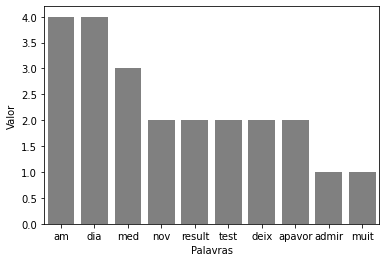

In [55]:
sns.barplot(data = df10_final, x='Palavras', y='Valor', color='gray')